<a href="https://colab.research.google.com/github/YunSeoHwan/My-own-study-repository/blob/main/ML_homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [53]:
import pandas as pd
import numpy as np
import random
import os
import gc
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
import matplotlib.font_manager as fm

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')

In [56]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/sha

In [55]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122352 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [59]:
fm._rebuild()

AttributeError: ignored

# Data Load

In [43]:
data = pd.read_csv('/content/drive/MyDrive/ML/data.csv')

In [32]:
data.tail(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2101,0,25,1628000.0,1072190.0,1,1,3.0,3.0,Sometimes,0,2.487070,0,0.067329,0.455823,Sometimes,Public_Transportation,4
2102,0,25,1628000.0,1081070.0,1,1,3.0,3.0,Sometimes,0,2.320068,0,0.045246,0.413106,Sometimes,Public_Transportation,4
2103,0,21,1724000.0,1330340.0,1,1,3.0,3.0,Sometimes,0,1.650612,0,1.537639,0.912457,Sometimes,Public_Transportation,4
2104,0,21,1732000.0,1330440.0,1,1,3.0,3.0,Sometimes,0,1.610768,0,1.510398,0.931455,Sometimes,Public_Transportation,4
2105,0,21,1727000.0,1313360.0,1,1,3.0,3.0,Sometimes,0,1.796267,0,1.728332,0.897924,Sometimes,Public_Transportation,4
2106,0,20,1711000.0,1314090.0,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,4
2107,0,21,1749000.0,1337430.0,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,4
2108,0,22,1752000.0,1336890.0,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,4
2109,0,24,1739000.0,1333470.0,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,4
2110,0,23,1739000.0,1334730.0,1,1,3.0,3.0,Sometimes,0,2.863513,0,1.026452,0.714137,Sometimes,Public_Transportation,4


# Processing

In [ ]:
# 결측치 존재 x
# 뒤로 갈수록 소수점 단위 지저분한 값 존재 -> 전처리 필요
# 성별, Y/N 정보는 one-hot encoding
# categorical -> Label encoding
# target col split

In [6]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2111 non-null   int64  
 1   Age         2111 non-null   int64  
 2   Height      2111 non-null   float64
 3   Weight      2111 non-null   float64
 4   family      2111 non-null   int64  
 5   고열량         2111 non-null   int64  
 6   야채          2111 non-null   float64
 7   끼니          2111 non-null   float64
 8   식간음식        2111 non-null   object 
 9   SMOKE       2111 non-null   int64  
 10  물섭취         2111 non-null   float64
 11  칼로리확인       2111 non-null   int64  
 12  운동빈도        2111 non-null   float64
 13  실내여가        2111 non-null   float64
 14  술           2111 non-null   object 
 15  교통수단        2111 non-null   object 
 16  NObeyesdad  2111 non-null   int64  
dtypes: float64(7), int64(7), object(3)
memory usage: 280.5+ KB


In [25]:
data.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,23.972525,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,0.020843,2.008011,0.045476,1.010298,0.657866,3.015632
std,0.500083,6.308664,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.142893,0.612953,0.208395,0.850592,0.608927,1.952090
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,0.000000,1.584812,0.000000,0.124505,0.000000,1.000000
50%,1.000000,22.000000,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,0.000000,2.000000,0.000000,1.000000,0.625350,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,0.000000,2.477420,0.000000,1.666678,1.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000,6.000000


In [49]:
data

,성별,나이,키,몸무게,가족력,고열량,야채,끼니,식간음식,담배,물섭취,칼로리확인,운동빈도,실내여가,술,교통수단,비만도
0,0,21,162.0,64.0,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21,152.0,56.0,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23,180.0,77.0,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27,180.0,87.0,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22,178.0,89.8,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,171.1,131.4,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21,174.9,133.7,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22,175.2,133.7,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24,173.9,133.3,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [47]:
# col 이름 바꾸기
data = data.rename(columns={'family_history_with_overweight': '가족력', 'FAVC': '고열량', 'FCVC': '야채',
                            'NCP': '끼니', 'CAEC': '식간음식', 'CH2O': '물섭취', 'SCC': '칼로리확인',
                            'FAF': '운동빈도', 'TUE': '실내여가', 'CALC': '술', 'MTRANS': '교통수단',
                            'Gender': '성별', 'SMOKE': '담배', 'Age': '나이', 'Height': '키', 'Weight': '몸무게', 'NObeyesdad' : '비만도'})

In [45]:
data['Age'] = data['Age'].astype(int)
data['Height'] = (data['Height'] * 100).round(1)
data['Weight'] = (data['Weight']).round(1)

In [48]:
# 질적 변수들을 수치화합니다
qual_col = ['성별', '가족력', '고열량', '담배','술', '교통수단', '식간음식', '칼로리확인', '비만도']

for i in qual_col:
    le = LabelEncoder()
    le=le.fit(data[i])
    data[i]=le.transform(data[i])

print('Done.')

Done.


In [19]:
# 질적 변수들을 수치화합니다
qual_col = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'NObeyesdad']

for i in qual_col:
    le = LabelEncoder()
    le=le.fit(data[i])
    data[i]=le.transform(data[i])

print('Done.')

Done.


<Axes: title={'center': 'Correlation of Features'}>

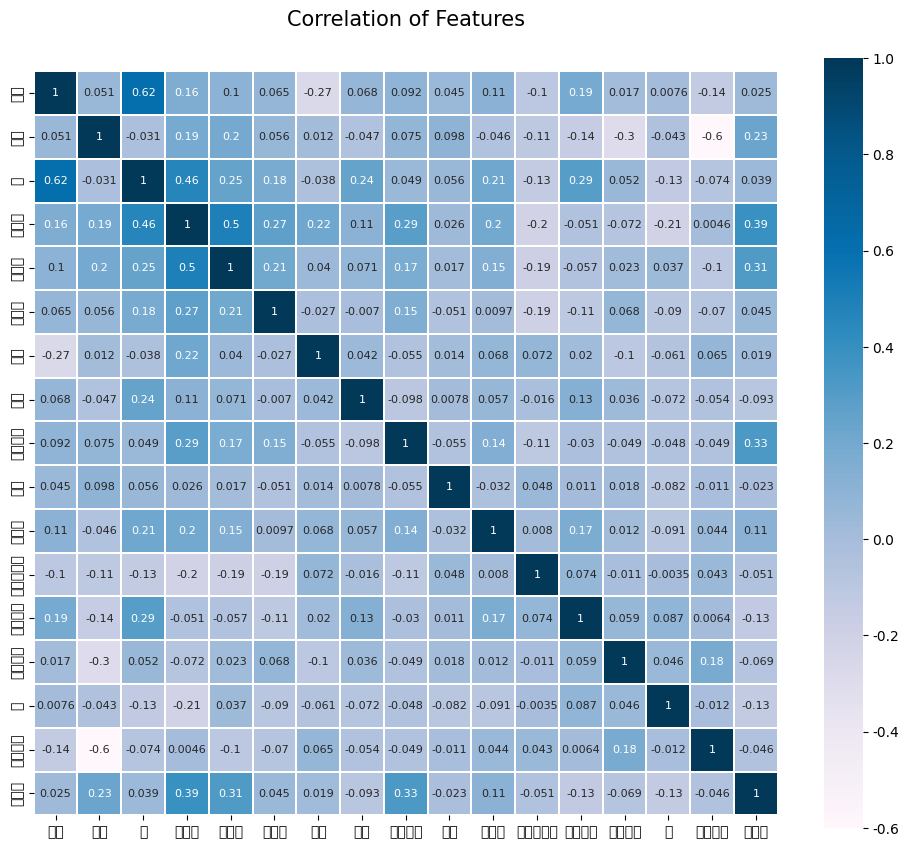

In [60]:
# 한글 폰트 설정
plt.rc("font", family="NanumGothic")

# Correlation Matrix
colormap = plt.cm.PuBu
plt.figure(figsize=(12, 10))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})